In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("bike_sharing.csv")
data = data.drop(columns="dteday", axis=0)
data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


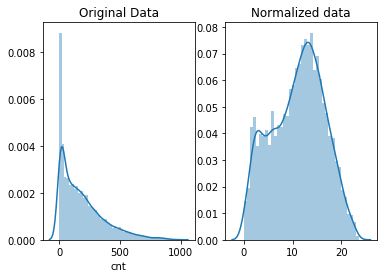

In [4]:
# now transforming feature variable
from scipy import stats
x_normalized_data = stats.boxcox(data["cnt"])
fig, ax=plt.subplots(1,2)
sns.distplot(data["cnt"], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
x_normalized_data = x_normalized_data[0].reshape(len(x_normalized_data[0]), 1)
data.cnt = x_normalized_data

In [5]:
x_data_set = np.array(data.drop(columns=["cnt"], axis=0))
y_data_set = np.array(pd.DataFrame(data.cnt))
x_data_set

array([[1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        1.3000e+01],
       [2.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 8.0000e+00,
        3.2000e+01],
       [3.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.0000e+00,
        2.7000e+01],
       ...,
       [1.7377e+04, 1.0000e+00, 1.0000e+00, ..., 1.6420e-01, 7.0000e+00,
        8.3000e+01],
       [1.7378e+04, 1.0000e+00, 1.0000e+00, ..., 1.3430e-01, 1.3000e+01,
        4.8000e+01],
       [1.7379e+04, 1.0000e+00, 1.0000e+00, ..., 1.3430e-01, 1.2000e+01,
        3.7000e+01]])

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_data_set = sc_x.fit_transform(x_data_set)
y_data_set = sc_y.fit_transform(y_data_set)

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")  # rbf makes our ML mpdel non linear
regressor.fit(x_data_set, y_data_set)

/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

ValueError: x and y must be the same size

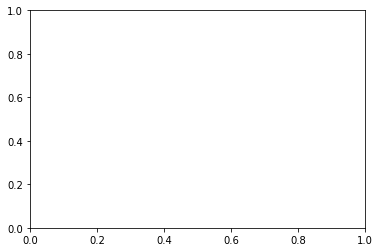

In [8]:
# Visualizing the linear regression results
plt.scatter(x_data_set, y_data_set, color ='red')
plt.plot(x_data_set, regressor.predict(x_data_set), color ='green')
plt.title('Truth or Bluff (Reg Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()